EN2550 ASSIGNMENT 1
NAME - Lankagama L.S.
INDEX NUMBER - 190350F

QUESTION 1

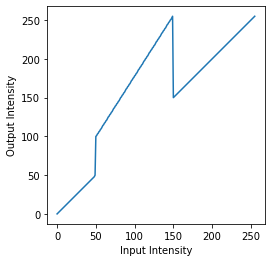

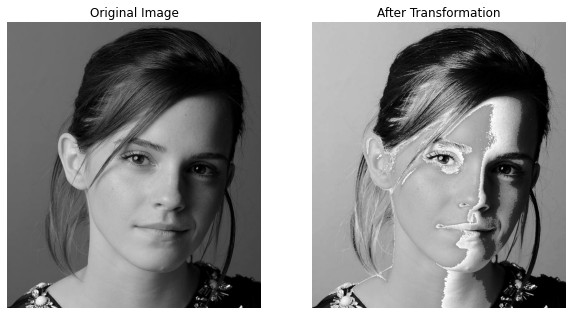

In [111]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\Assignment\emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0 , 50, 50)                                       #get dark pixels are same as original image
t2 = np.linspace(100 , 255, 100)                                   #get gray pixels intensity hihger than input image
t3 = np.linspace(150 , 255, 106)                                   #get lighter pixels are same as original image 

t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)        #merge all above transformation to one variable
fig, ax = plt.subplots()
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
ax.plot(t)
ax.set_aspect("equal")
assert len(t) == 256
g = cv.LUT(f, t)                                                   #using look up table to map values of input and transformation images

Img = cv.cvtColor(f, cv.COLOR_BGR2RGB)
img = cv.cvtColor(g , cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2, sharex= 'all', sharey='all', figsize = (10,10))
ax[0].set_title("Original Image")
ax[0].imshow(Img)
ax[0].axis('off')

ax[1].set_title("After Transformation")
ax[1].imshow(img)
ax[1].axis('off')
plt.show()


QUESTION 2

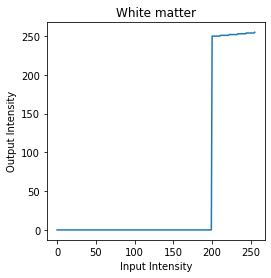

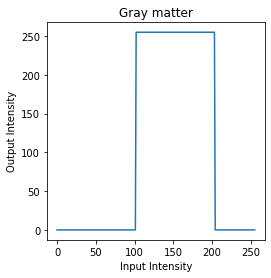

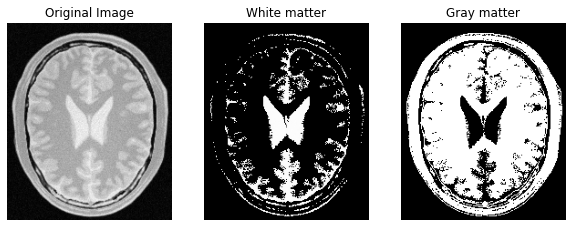

In [ ]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\Assignment\brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0, 0, 100)                               # dark pixels assign to lower intensity
t2 = np.linspace(0, 0, 100)                               # gray pixels assign to lower intensity
t3 = np.linspace(250, 255, 56)                            # lighter pixels assign to higher intensity

t6 = np.linspace(0, 0, 102)                               # dark pixels assign to lower intensity
t7 = np.linspace(255,255, 102)                            # gray pixels assign to higher intensity
t8 = np.linspace(0, 0, 52)                                # lighter pixels assign to lower intensity


t_w = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
fig, ax = plt.subplots()
plt.title("White matter")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
ax.plot(t_w)
ax.set_aspect("equal")
assert len(t_w) == 256
g_w = cv.LUT(f, t_w)

t_g = np.concatenate((t6, t7, t8), axis = 0).astype(np.uint8)
fig, ax = plt.subplots()
plt.title("Gray matter")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
ax.plot(t_g)
ax.set_aspect("equal")
assert len(t_g) == 256
g_g = cv.LUT(f, t_g)

or_img = cv.cvtColor(f, cv.COLOR_BGR2RGB)
wh_img = cv.cvtColor(g_w , cv.COLOR_BGR2RGB)
gr_img = cv.cvtColor(g_g , cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,3, sharex = 'all', sharey = 'all', figsize = (10,10))

ax[0].set_title("Original Image")
ax[0].imshow(or_img)
ax[0].axis('off')

ax[1].set_title("White matter")
ax[1].imshow(wh_img)
ax[1].axis('off')

ax[2].set_title("Gray matter")
ax[2].imshow(gr_img)
ax[2].axis('off')
plt.show()


QUESTION 3

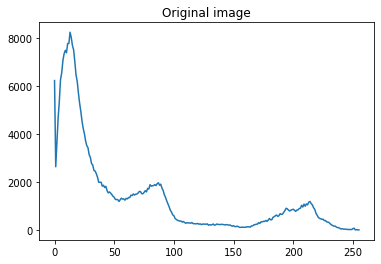

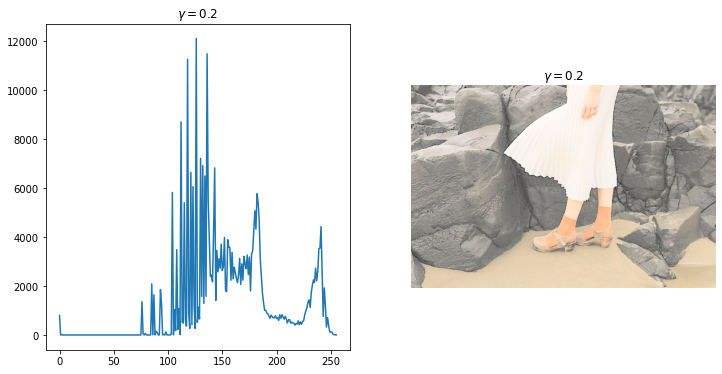

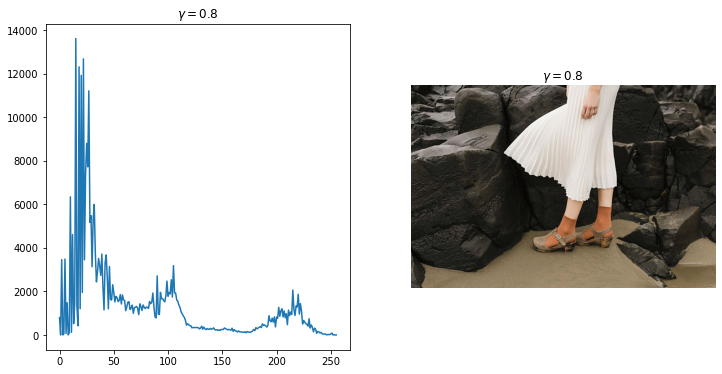

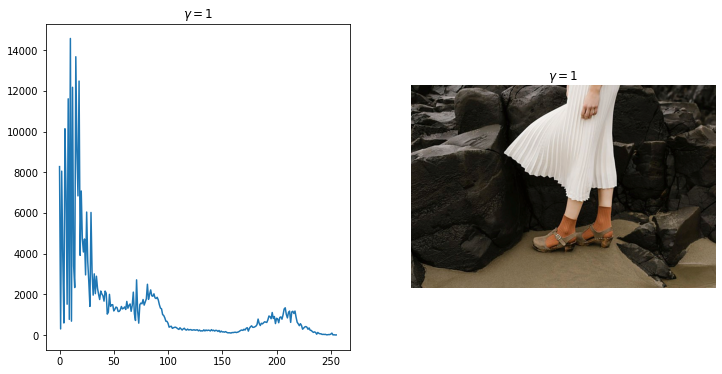

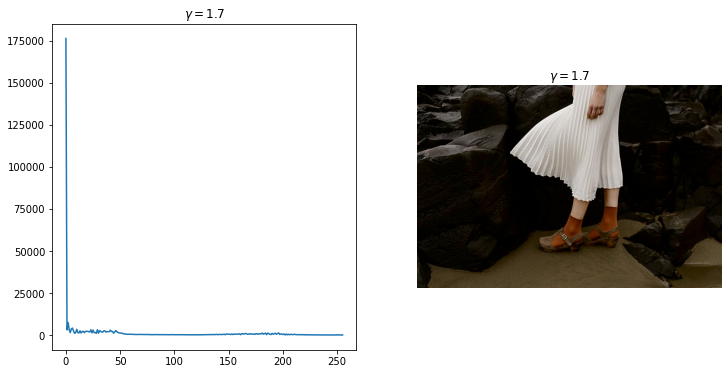

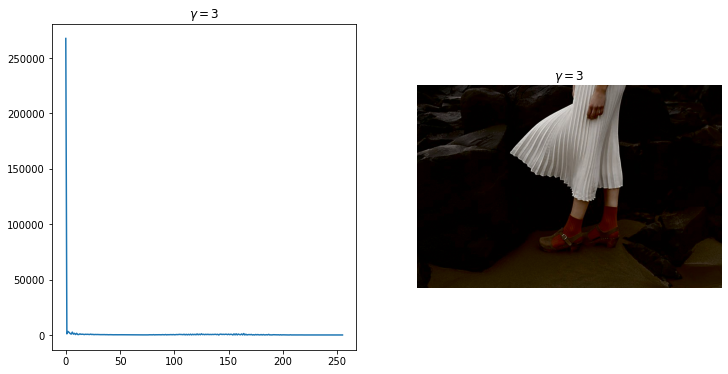

In [112]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert f is not None
Lab = cv.cvtColor(f, cv.COLOR_BGR2Lab)

L, a, b = cv.split(Lab)                                                          #get values of Lab plane
gamma = [0.2 , 0.8, 1, 1.7, 3]                                                   #array of different gamma values
hist_f = cv.calcHist([f], [0], None, [256], [0,256])                             #built histogram of image

fig, ax = plt.subplots()
ax.plot(hist_f)
plt.title("Original image")
print()

for i in range (0,5):
    t = np.array([(p/255.0)**gamma[i]*(255.0) for p in L]).astype(np.uint8)      #apply gamma correction to L plane 
    newLab = cv.merge([t,a,b])                                                   #merge corrected L value 
    newf = cv.cvtColor(newLab, cv.COLOR_LAB2BGR)
    hist_newf = cv.calcHist([newf], [0], None, [256], [0,256])                   #built new histogram of image

    fig, ax = plt.subplots(1,2, figsize = (12,6))
    ax[0].plot(hist_newf)
    ax[0].set_title("$\gamma = $"+ str(gamma[i]))

    img = cv.cvtColor(newf, cv.COLOR_BGR2RGB)
    
    ax[1].set_title("$\gamma = $"+ str(gamma[i]))
    ax[1].imshow(img)
    ax[1].axis('off')
    plt.show()


QUESTION 4

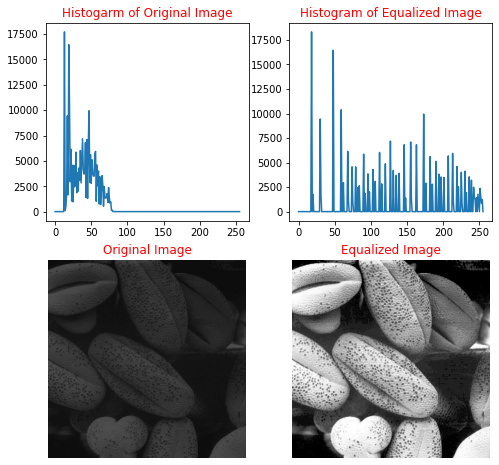

0

In [117]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\shells.png",cv.IMREAD_GRAYSCALE)
assert f is not None

def get_histo_equ(image):

    hist_f, bins = np.histogram(image.ravel(), 256, [0, 256])                    #get histogram of original image
    cdf = hist_f.cumsum()                                                        #get cumlative distibution
    cdf_norm = np.round(cdf * (255.0))/(cdf.max())                               #normalized it value in range 0 to 255
    g = cv.LUT(image, cdf_norm)                                                  #map values of original and equalized image using look up table
    hist_g, hist_bins = np.histogram(g.ravel(), 256, [0,256])                    #get histogram of equalized image

    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) 

    fig, ax = plt.subplots(2,2, figsize = (8,8))
    ax[0,0].set_title('Histogarm of Original Image', color = 'r')
    ax[0,0].plot(hist_f)

    ax[0,1].set_title('Histogram of Equalized Image', color = 'r')
    ax[0,1].plot(hist_g)

    ax[1,0].set_title('Original Image', color = 'r')
    ax[1,0].imshow(image, cmap = 'gray')
    ax[1,0].axis('off')

    ax[1,1].set_title('Equalized Image', color = 'r')
    ax[1,1].imshow(g, cmap = 'gray')
    ax[1,1].axis('off')

    plt.show()
    return 0
get_histo_equ(f)



QUESTION 5(a)

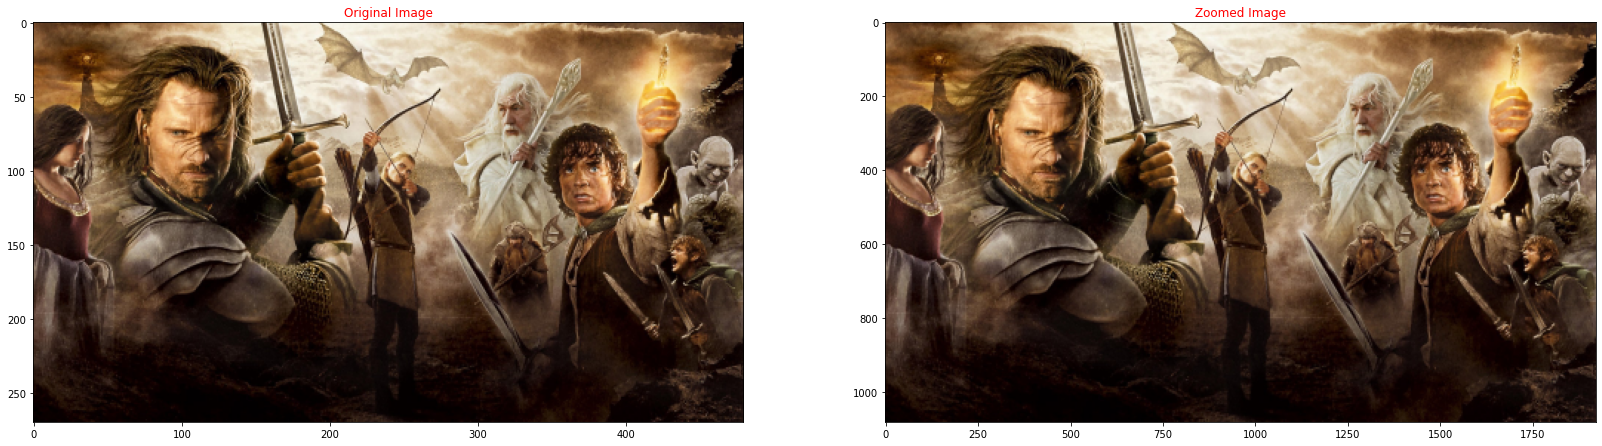

In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\a1q5images\im01small.png", cv.IMREAD_COLOR)

scale = 4                                                 #zooming scale 
rows = im.shape[0]*scale                                  #scale the row size of zoomed image
cols = im.shape[1]*scale                                  #scale the coloumn size of zoomed image

zoomed = np.zeros((rows,cols,3),dtype=im.dtype)           #built zero array to store value in zoomed image

for i in range (0,rows):
    for j in range (0,cols):
        for k in range (0,3):
            zoomed[i][j][k] = im[i//scale][j//scale][k]


fig, ax = plt.subplots(1,2 , figsize = (28,28))
ax[0].set_title('Original Image', color = 'r')
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
ax[0].imshow(img)

ax[1].set_title('Zoomed Image', color = 'r')
zoomed_img = cv.cvtColor(zoomed, cv.COLOR_BGR2RGB)
ax[1].imshow(zoomed_img)

plt.show()


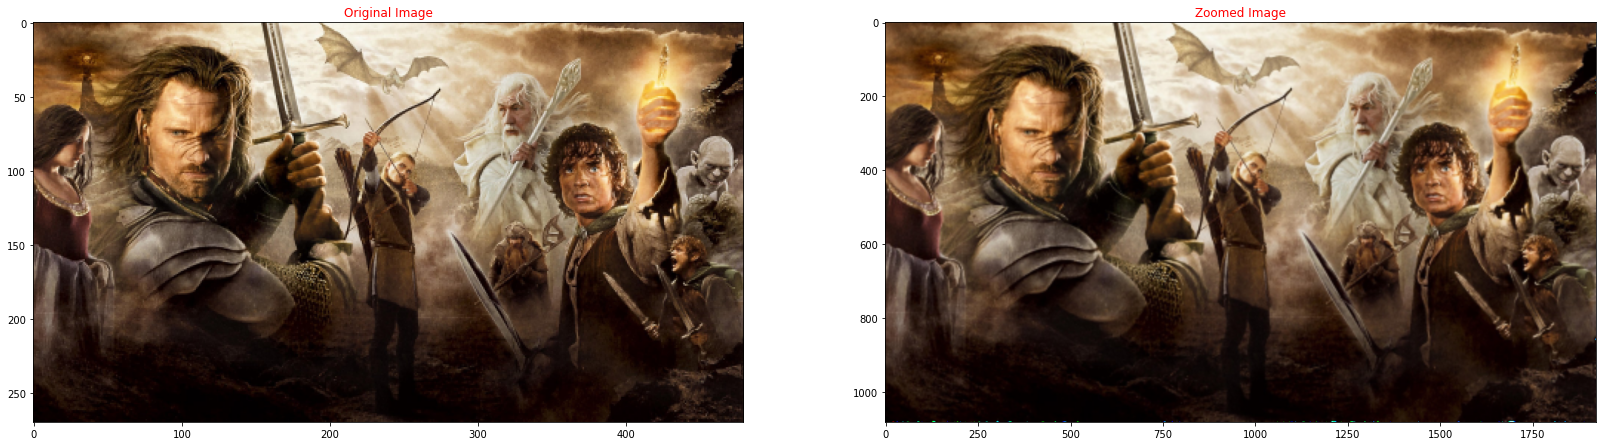

[242 153 249]


In [132]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\a1q5images\im01small.png", cv.IMREAD_COLOR)
orig_im_1 = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\a1q5images\im01.png", cv.IMREAD_COLOR)

scale = 4
rows = (im.shape[0]*scale)
cols = (im.shape[1]*scale)
zoomed = np.zeros((rows,cols,3),dtype=im.dtype)

for i in range (0,rows):
    for j in range (0,cols):
        for k in range (3): 
            P0 = i/scale                                                      #get P0 value which correspond to actual pixel 
            Q0 = j/scale                                                      #get Q0 value which correspond to actual pixel 

            P = min(max(round(P0-0.5),0),im.shape[0]-2)                       #adjust the range
            Q = min(max(round(Q0-0.5),0),im.shape[1]-2)                       #adjust the range

            P_rat = P0 - P                                                    #get row ratio value
            Q_rat = Q0 - Q                                                    #get coloumn ratio value

            pos00 = im[P][Q][k]                                               #define 4 pixels value near to correspond pixel
            pos01 = im[P][Q+1][k]
            pos10 = im[P+1][Q][k]
            pos11 = im[P+1][Q+1][k]

            first_m = pos00*(1-P_rat)+ pos10*(P_rat)                          #get actual value using above row and coloumn ratios
            second_m = pos01*(1-P_rat)+ pos11*(P_rat)
            zoomed[i][j][k] = round((first_m)*(1-Q_rat) + (second_m)*(Q_rat))  
           

fig, ax = plt.subplots(1,2 , figsize = (28,28))
ax[0].set_title('Original Image', color = 'r')
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
ax[0].imshow(img)

ax[1].set_title('Zoomed Image', color = 'r')
zoomed_img = cv.cvtColor(zoomed, cv.COLOR_BGR2RGB)
ax[1].imshow(zoomed_img)

plt.show()

diff_1 = 0

for i in range(rows):
    for j in range(cols):
        diff_1 += (np.abs(orig_im_1[i][j]-zoomed[i][j]))**2


print(diff_1)




In [135]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im_1 = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\a1q5images\im02small.png", cv.IMREAD_COLOR)
orig_im_2 = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\a1q5images\im02.png", cv.IMREAD_COLOR)

scale = 4

rows1 = (im_1.shape[0]*scale)
cols1 = (im_1.shape[1]*scale)
zoomed1 = np.zeros((rows1,cols1,3),dtype=im_1.dtype)

for i in range (0,rows1):
    for j in range (0,cols1):
        for k in range (3): 
            P0 = i/scale                                                      #get P0 value which correspond to actual pixel 
            Q0 = j/scale                                                      #get Q0 value which correspond to actual pixel 

            P = min(max(round(P0-0.5),0),im_1.shape[0]-2)                       #adjust the range
            Q = min(max(round(Q0-0.5),0),im_1.shape[1]-2)                       #adjust the range

            P_rat = P0 - P                                                    #get row ratio value
            Q_rat = Q0 - Q                                                    #get coloumn ratio value

            pos00 = im_1[P][Q][k]                                               #define 4 pixels value near to correspond pixel
            pos01 = im_1[P][Q+1][k]
            pos10 = im_1[P+1][Q][k]
            pos11 = im_1[P+1][Q+1][k]

            first_m = pos00*(1-P_rat)+ pos10*(P_rat)                          #get actual value using above row and coloumn ratios
            second_m = pos01*(1-P_rat)+ pos11*(P_rat)
            zoomed1[i][j][k] = round((first_m)*(1-Q_rat) + (second_m)*(Q_rat))

diff_2 = 0 

for i in range(rows1):
    for j in range(cols1):
        diff_2 += (np.abs(orig_im_2[i][j]-zoomed1[i][j]))**2

print(diff_2)

QUESTION 6(a)

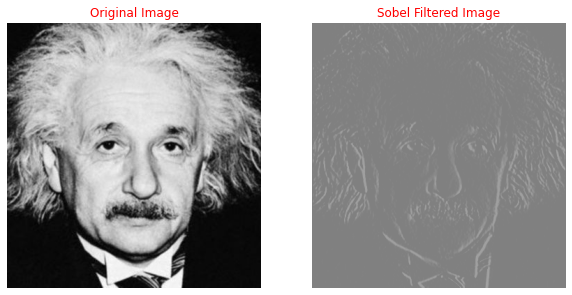

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\einstein.png", cv.IMREAD_GRAYSCALE)

kernel = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype='float')       #make horizontal kernal
imgc = cv.filter2D(img, -1, kernel)                                  #Using filter2D function to filter

fig, ax = plt.subplots(1, 2 , sharex = 'all', sharey = 'all', figsize = (10,10))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image', color = 'r')
ax[0].axis('off')

ax[1].imshow(imgc, cmap = 'gray',vmax = 1020, vmin = -1020)
ax[1].set_title('Sobel Filtered Image', color ='r')
ax[1].axis('off')
plt.show()


QUESTION 6(b)

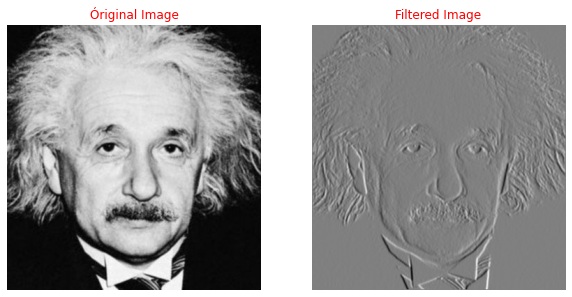

In [104]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import math


def filter (image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1                                                  #check the margin of image
    k_hh, k_hw = math.floor(kernel.shape[0]/2) , math.floor(kernel.shape[1]/2)                                #margin value add to two variables
    h, w = image.shape                                                                                        #get image size to h and w 
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh+1, n-k_hw:n+ k_hw+1].flatten(), kernel.flatten())# get relevant value by multiplication kenerl values with corresponds image values 
    return result



img = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\einstein.png", cv.IMREAD_GRAYSCALE)
sobel_H = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype='float')
imgc = filter(img, sobel_H)
imgc = imgc*255.0

fig, ax = plt.subplots(1,2, sharex= 'all', sharey= 'all', figsize = (10,10))
ax[0].imshow(img, cmap ='gray')
ax[0].set_title('Óriginal Image', color = 'r')
ax[0].axis('off')

ax[1].imshow(imgc, cmap ='gray', vmax = 780, vmin = -780)
ax[1].set_title('Filtered Image', color ='r')
ax[1].axis('off')

plt.show()




QUESTION 6(c)

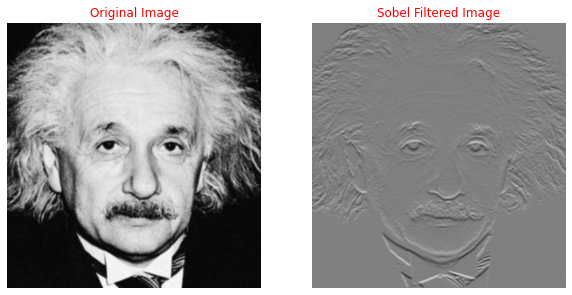

In [102]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

array_1 = np.array([[1],[2],[1]], dtype=np.float32)          #make raw vector 
array_2 = np.array([[1, 0, -1]], dtype=np.float32)           #make coloumn vector
imgc = cv.sepFilter2D(img, -1, array_1, array_2)             #using sepFilter2D function to doing seperation filter 

fig, ax = plt.subplots(1, 2 , sharex = 'all', sharey = 'all', figsize = (10,10))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image', color = 'r')
ax[0].axis('off')

ax[1].imshow(imgc, cmap = 'gray', vmax = 1020, vmin = -1020 )
ax[1].set_title('Sobel Filtered Image', color ='r')
ax[1].axis('off')
plt.show()


QUESTION 7(a)

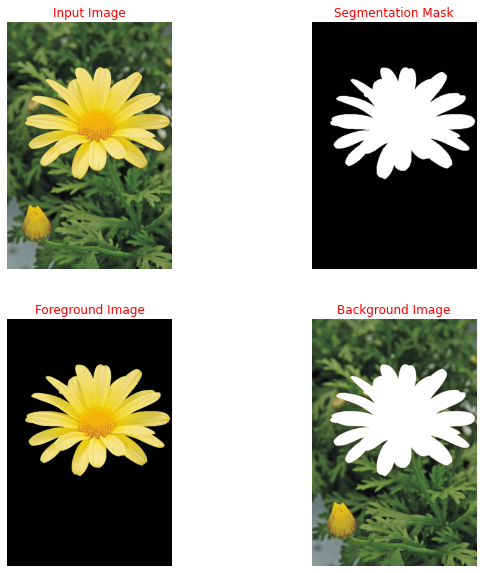

In [126]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\daisy.jpg", cv.IMREAD_COLOR)              

mask = np.zeros(img.shape[:2],np.uint8)                               #built image size zero array                               
bgdModel = np.zeros((1,65),np.float64)                                #built background zero array
fgdModel = np.zeros((1,65),np.float64)                                #built foreground zero array
rect = (50,120,550,500)                                               #define rectangular region to grab cut
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')             #built 0, 1 array to remove background
mask3 = (mask2 * 255).astype(np.uint8)                                #get the grabcut area as white
img_cut = img*mask2[:,:,np.newaxis]                                   #using image value get grabcut image

mask3 = cv.cvtColor(mask3,cv.COLOR_BGR2RGB)
new_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
new_img_cut = cv.cvtColor(img_cut, cv.COLOR_BGR2RGB)
back_img = cv.cvtColor(mask3, cv.COLOR_BGR2RGB)+(new_img - new_img_cut)


fig, ax = plt.subplots(2,2, sharex = 'all', sharey = 'all', figsize = (10,10))
ax[0,0].imshow(new_img)
ax[0,0].set_title('Input Image', color = 'r')
ax[0,0].axis('off')

ax[0,1].imshow(mask3)
ax[0,1].set_title('Segmentation Mask', color = 'r')
ax[0,1].axis('off')

ax[1,0].imshow(new_img_cut)
ax[1,0].set_title('Foreground Image', color = 'r')
ax[1,0].axis('off')

ax[1,1].imshow(back_img)
ax[1,1].set_title('Background Image', color = 'r')
ax[1,1].axis('off')

plt.show()



QUESTION 7(b)

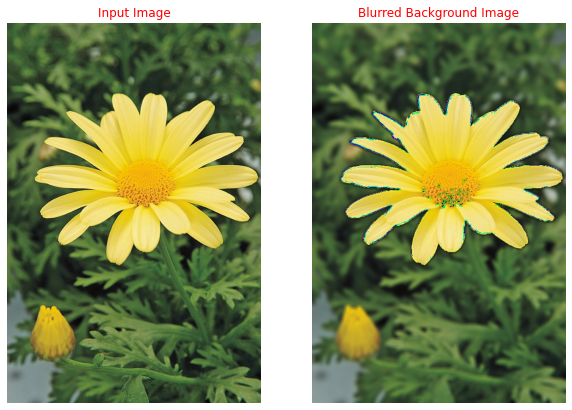

In [108]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r"C:\Users\Lahiru Sanjaya\Desktop\image_Ass\daisy.jpg", cv.IMREAD_COLOR)             
mask = np.zeros(img.shape[:2],np.uint8)                                                               


bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,120,550,500) 
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = (mask2 * 255).astype(np.uint8)
img_cut = img*mask2[:,:,np.newaxis]

back_img = cv.cvtColor(mask3, cv.COLOR_BGR2RGB)              #get background image by using mask3
new_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)                 #get original image using color conversion
new_img_cut = cv.cvtColor(img_cut, cv.COLOR_BGR2RGB)         #get cut image
blurred_img = cv.blur(new_img-new_img_cut, (10,10))          #blur the background using blur function
blurred_background_img = new_img_cut + blurred_img           #combine grab cut image and blurred background

fig, ax = plt.subplots(1,2, sharex = 'all', sharey = 'all', figsize = (10,10))
ax[0].imshow(new_img)
ax[0].set_title('Input Image', color = 'r')
ax[0].axis('off')

ax[1].imshow(blurred_background_img)
ax[1].set_title('Blurred Background Image', color = 'r')
ax[1].axis('off')
plt.show()